In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [5]:
# Load in the data
cifar = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170500096/170498071 [==============================] - 38s 0us/step


In [14]:
# Number of classes
K = len(set(y_test))

In [15]:
# Build the model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [19]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7553 - accuracy: 0.3520 - val_loss: 1.5290 - val_accuracy: 0.4520
Epoch 2/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3138 - accuracy: 0.5275 - val_loss: 1.1338 - val_accuracy: 0.5875
Epoch 3/15
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1545 - accuracy: 0.5834 - val_loss: 1.0427 - val_accuracy: 0.6408
Epoch 4/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0554 - accuracy: 0.6218 - val_loss: 0.9785 - val_accuracy: 0.6584
Epoch 5/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9676 - accuracy: 0.6569 - val_loss: 0.9315 - val_accuracy: 0.6704
Epoch 6/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8951 - accuracy: 0.6796 - val_loss: 0.8895 - val_accuracy: 0.6935
Epoch 7/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8504 - accuracy: 0.6944 - val_loss: 0.8598 -

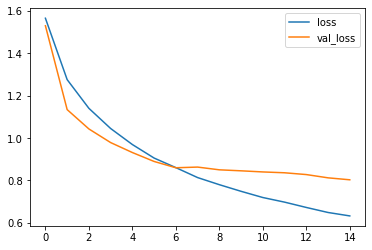

In [21]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

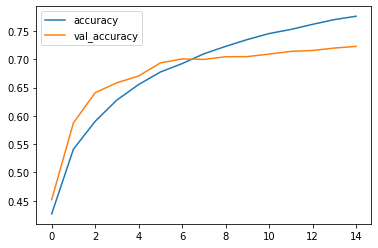

In [23]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[776  11  37  19  15   6  10  17  62  47]
 [ 16 772   3   3   7   6  13   7  42 131]
 [ 58   9 551  54 119  73  72  41  13  10]
 [ 23  10  44 491  93 191  77  39  11  21]
 [ 24   3  37  39 723  33  38  89  11   3]
 [ 14   5  31 147  77 633  30  52   4   7]
 [  4   1  25  35  47  27 832  12  10   7]
 [ 13   2  16  33  53  65  11 789   4  14]
 [ 79  20   2  11  12   6   3  10 831  26]
 [ 33  53   6   8   7   9   4  18  33 829]]


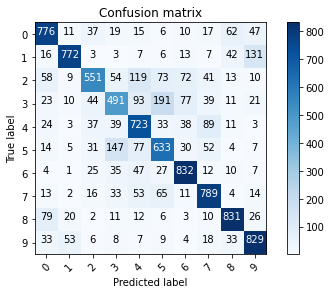

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
  
    print(cm)
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
  
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
  
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [25]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

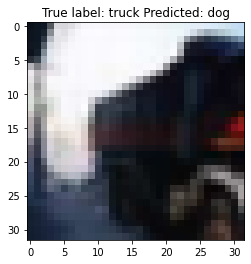

In [27]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));